# Import Library

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

# Import Data

In [4]:
from google.colab import files
import pandas as pd

# Menggunakan widget file upload Colab
uploaded = files.upload()

Saving cleandata.csv to cleandata.csv


In [3]:
# train data
import pandas as pd
df = pd.read_csv("trainclean.csv") #janlup ganti kalo pake nama file lain
df.head()

,created_at,id_str,full_text,buzzer,label,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,image_url,location,no_paslon,0,negatif,clean
0,Sat Nov 25 10:39:14 +0000 2023,1728362703042048028,Dalam upaya mewujudkan Desa yang yang Mandiri ...,NaN,1,205,4492,4213,7945,in,748953283,1728362703042048028,DPP_PKB,https://twitter.com/DPP_PKB/status/17283627030...,https://pbs.twimg.com/media/F_xgtsgaYAAM-UG.jpg,Jalan Raden Saleh No 9 Jakarta,1,1.0,positif,upaya mewujudkan desa mandiri sejahtera anies ...
1,Thu Nov 30 08:42:58 +0000 2023,1730145383375106061,Calon wakil presiden (cawapres) Koalisi Peruba...,0.0,0,211,1639,684,3432,in,55507370,1730145383375106061,tvOneNews,https://twitter.com/tvOneNews/status/173014538...,https://pbs.twimg.com/media/GAK19fraYAEw553.jpg,"Pulo Gadung, Indonesia",1,NaN,NaN,calon wakil presiden cawapres koalisi perubaha...
2,Tue Nov 28 09:14:08 +0000 2023,1729428450312958140,Padahal yang tanya Gus Imin Profesor lho 👍 #...,1.0,1,0,10,48,132,in,836539655478624258,1729428450312958140,aniesmania,https://twitter.com/aniesmania/status/17294284...,https://pbs.twimg.com/ext_tw_video_thumb/17294...,NaN,1,0.0,bkn buzzer,imin profesor
3,Tue Nov 28 10:40:07 +0000 2023,1729450088769126604,Kata-kata hari ini dari Gus Imin ☝❤🇮🇩 #Amin #...,1.0,1,5,9,260,648,in,836539655478624258,1729450088769126604,aniesmania,https://twitter.com/aniesmania/status/17294500...,https://pbs.twimg.com/ext_tw_video_thumb/17294...,NaN,1,1.0,buzzer,katakata imin
4,Wed Nov 29 17:05:22 +0000 2023,1729909428575728066,JIKA Anies masih Kampanye dikalangan Org² Pint...,0.0,1,120,585,1677,5496,in,1031514793000099846,1729909428575728066,BarBaro5_,https://twitter.com/BarBaro5_/status/172990942...,https://pbs.twimg.com/media/GAHfdUsakAIx2Ku.jpg,"Cina, Indonesia",1,NaN,NaN,anies kampanye dikalangan org² pintar kesalaha...


In [5]:
# test data
import pandas as pd
testdata = pd.read_csv("cleandata.csv") #janlup ganti kalo pake nama file lain
testdata.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,image_url,location,paslon,clean
0,Tue Nov 28 05:45:02 +0000 2023,"1,72938E+18",Pendukung Ganjar Mahfud Histeris Menyambut Keh...,8,51,259,723,in,"1,60364E+18","1,72938E+18",cobeh2022,https://twitter.com/cobeh2022/status/172937582...,https://pbs.twimg.com/ext_tw_video_thumb/17293...,NaN,1,pendukung ganjar mahfud histeris menyambut keh...
1,Mon Nov 27 19:34:10 +0000 2023,"1,72922E+18",Clear Ya .. SELAMA INI HANYA BUZZER PKI SER...,6,8,165,234,in,"1,26981E+18","1,72922E+18",ZulkifliLubis69,https://twitter.com/ZulkifliLubis69/status/172...,https://pbs.twimg.com/ext_tw_video_thumb/17292...,NaN,1,clear buzzer bangsat bangsa dukung zionie anie...
2,Thu Nov 30 03:37:43 +0000 2023,"1,73007E+18",Jangan takut/ragu dukung Anies Baswedan jadi P...,5,10,122,281,in,158162219,"1,73007E+18",arwidodo,https://twitter.com/arwidodo/status/1730068565...,https://pbs.twimg.com/ext_tw_video_thumb/17300...,Indonesia,1,takutragu dukung anies baswedan presiden
3,Mon Nov 27 12:59:14 +0000 2023,"1,72912E+18",Bawaslu cekatan mencegah Anies pidato... Semog...,10,43,215,329,in,"1,42979E+18","1,72912E+18",ommi_siregar,https://twitter.com/ommi_siregar/status/172912...,https://pbs.twimg.com/ext_tw_video_thumb/17291...,"DKI Jakarta, Indonesia????",1,bawaslu cekatan mencegah anies pidato semoga n...
4,Wed Nov 29 14:35:20 +0000 2023,"1,72987E+18",“Jawaban Anies Baswedan saat ditanya jika bel...,2,7,94,162,in,"1,60328E+18","1,72987E+18",AnKiiim_,https://twitter.com/AnKiiim_/status/1729871670...,https://pbs.twimg.com/ext_tw_video_thumb/17298...,NaN,1,anies baswedan beliau presiden proyek food est...


# Cleaning

In [6]:
data = df[["clean", "label", "no_paslon"]]
data['label'] = data['label'].replace({0: 'negative', 1: 'positive'})
data.tail()

<ipython-input-6-5a9327fd81b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].replace({0: 'negative', 1: 'positive'})


,clean,label,no_paslon
295,ganjar kritik penegakan hukum jokowi nasdem ma...,negative,3
296,bagus rejeki ditolak terima bantuannya pilih n...,positive,3
297,sulit perjuangan indah kemenangan gasspolll,positive,3
298,momen ganjar pranowo bersilaturahmi kantor kup...,positive,3
299,bandara muhammad salahuddinbelo nusa tenggara ...,positive,3


In [7]:
s = 0
for i in data['clean']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each review : ",s/data.shape[0])
pos = 0
for i in range(data.shape[0]):
    if data.iloc[i]['label'] == 'positive':
        pos = pos + 1
neg = data.shape[0]-pos
print("Percentage of reviews with positive sentiment is "+str(pos/data.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/data.shape[0]*100)+"%")

Average length of each review :  13.793333333333333
Percentage of reviews with positive sentiment is 66.0%
Percentage of reviews with negative sentiment is 34.0%


In [8]:
reviews = data['clean'].values
labels = data['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [9]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [10]:
# Hyperparameters of the model
vocab_size = 3000
oov_tok = ''
embedding_dim = 100
max_length = 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

# Modelling

In [11]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387601 (1.48 MB)
Trainable params: 387601 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
num_epochs = 50
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1)

Epoch 1/50
7/7 [==============================] - 7s 351ms/step - loss: 0.6766 - accuracy: 0.6386 - val_loss: 0.6204 - val_accuracy: 0.7826
Epoch 2/50
7/7 [==============================] - 1s 196ms/step - loss: 0.6438 - accuracy: 0.6436 - val_loss: 0.5522 - val_accuracy: 0.7826
Epoch 3/50
7/7 [==============================] - 1s 191ms/step - loss: 0.6307 - accuracy: 0.6436 - val_loss: 0.5550 - val_accuracy: 0.7826
Epoch 4/50
7/7 [==============================] - 1s 196ms/step - loss: 0.5817 - accuracy: 0.6535 - val_loss: 0.5518 - val_accuracy: 0.8261
Epoch 5/50
7/7 [==============================] - 2s 333ms/step - loss: 0.5008 - accuracy: 0.8020 - val_loss: 0.5771 - val_accuracy: 0.7391
Epoch 6/50
7/7 [==============================] - 2s 256ms/step - loss: 0.3881 - accuracy: 0.8861 - val_loss: 0.4870 - val_accuracy: 0.7826
Epoch 7/50
7/7 [==============================] - 1s 197ms/step - loss: 0.2541 - accuracy: 0.9059 - val_loss: 0.4917 - val_accuracy: 0.7391
Epoch 8/50
7/7 [====

In [14]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

3/3 [==============================] - 0s 40ms/step
Accuracy of prediction on test set :  0.6666666666666666


# Testing

In [15]:
testdata.clean=testdata.clean.astype(str)
sequences = tokenizer.texts_to_sequences(testdata['clean'])
padded = pad_sequences(sequences, padding='post', maxlen=max_length)

# Get labels based on probability 1 if p >= 0.5 else 0
prediction = model.predict(padded)
pred_labels = [1 if p >= 0.5 else 0 for p in prediction]

# Menambahkan kolom hasil prediksi ke DataFrame
testdata['predicted_sentiment'] = pred_labels

# Tampilkan DataFrame dengan hasil prediksi
testdata.tail()

48/48 [==============================] - 3s 59ms/step


,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,image_url,location,paslon,clean,predicted_sentiment
1524,Sat Dec 02 11:37:14 +0000 2023,"1,73091E+18",Ganjar – Mahfud Berkomitmen Membangun Indonesi...,0,0,1,6,in,"1,53481E+18","1,73091E+18",linimasasumsel,https://twitter.com/linimasasumsel/status/1730...,https://pbs.twimg.com/media/GAVxFcsawAA3NxV.jpg,Sumatera Selatan,3,ganjar mahfud berkomitmen membangun indonesia ...,0
1525,Sat Dec 02 14:40:01 +0000 2023,"1,73096E+18",CAWAPRES ILEGAL TAMATAN SMK BISNIS AMAA KAESAN...,0,2,9,15,in,"1,63784E+18","1,73096E+18",Ganjar_Mahfud03,https://twitter.com/Ganjar_Mahfud03/status/173...,NaN,Indonesia,3,cawapres ilegal tamatan bisnis amaa kaesang tu...,0
1526,Fri Dec 01 15:38:34 +0000 2023,"1,73061E+18",Calon presiden (capres) Ganjar Pranowo meluncu...,0,91,23,104,in,"1,29125E+18","1,73061E+18",ngopibareng_id,https://twitter.com/ngopibareng_id/status/1730...,NaN,Surabaya,3,calon presiden capres ganjar pranowo meluncurk...,1
1527,Fri Dec 01 12:35:25 +0000 2023,"1,73057E+18",Jawaban Ganjar soal Kampanyenya yang Dinilai M...,0,0,6,3,in,"9,09642E+17","1,73057E+18",Ganjar_Mahfud,https://twitter.com/Ganjar_Mahfud/status/17305...,NaN,Jakarta Capital Region,3,ganjar kampanyenya dinilai membosankan,1
1528,Fri Dec 01 12:45:20 +0000 2023,"1,73057E+18",Ganjar Pranowo Kunjungi Gereja di Kupang Bahas...,0,0,7,3,in,"9,09642E+17","1,73057E+18",Ganjar_Mahfud,https://twitter.com/Ganjar_Mahfud/status/17305...,NaN,Jakarta Capital Region,3,ganjar pranowo kunjungi gereja kupang bahas to...,1


# Visualisasi

In [24]:
# Percobaan visualisasi
df1 = data[["clean", "no_paslon", "label"]]
df1['label'] = data['label'].replace({'negative': 0 , 'positive': 1})
df2 = testdata.rename(columns={'predicted_sentiment': 'label'}, inplace=True)

eda_data = pd.concat([df1, df2], axis=1)
eda_data.head()

,clean,no_paslon,label
0,upaya mewujudkan desa mandiri sejahtera anies ...,1,1
1,calon wakil presiden cawapres koalisi perubaha...,1,0
2,imin profesor,1,1
3,katakata imin,1,1
4,anies kampanye dikalangan org² pintar kesalaha...,1,1


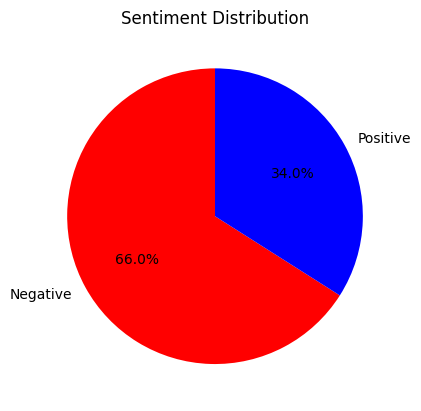

In [29]:
import matplotlib.pyplot as plt

# Menghitung jumlah label 1 dan 0
count_labels = data['label'].value_counts()

# Membuat pie chart
plt.pie(count_labels, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])

# Menampilkan label pada pie chart
plt.title('Sentiment Distribution')

# Menampilkan pie chart
plt.show()

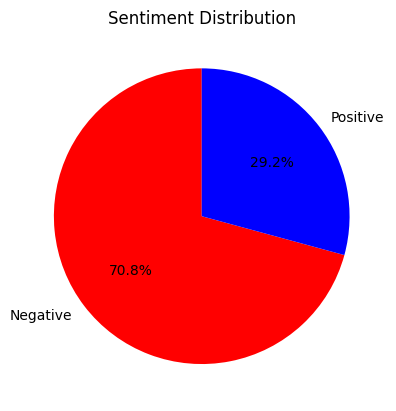

In [28]:
import matplotlib.pyplot as plt

# Menghitung jumlah label 1 dan 0
count_labels = testdata['label'].value_counts()

# Membuat pie chart
plt.pie(count_labels, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])

# Menampilkan label pada pie chart
plt.title('Sentiment Distribution')

# Menampilkan pie chart
plt.show()